The number of billionaires in a country says a lot about the business environment, startup success rate, and many other economic features of a Country. So if you want to learn more about how we can find relationships among billionaires around the world, this article is for you. In this article, I will walk you through the task of billionaires analysis with Python.

## Billionaires Analysis with Python

In [45]:
# The dataset that I am using to analyze the data about billionaires around the world was curated by Forbes
# and is downloaded from Kaggle. The dataset contains information about global billionaires in 2021, including their:

# Names
# Net Worth
# Country
# Source
# Rank
# Age
# Industry

So let’s get started with the task of billionaires analysis by importing the necessary Python libraries and the dataset:

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Data Collaction

In [12]:
data = pd.read_csv(r".\data\Billionaries Analysis.csv")
data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


In [13]:
print(data.head())

                       Name NetWorth        Country         Source  Rank  \
0                Jeff Bezos   $177 B  United States         Amazon     1   
1                 Elon Musk   $151 B  United States  Tesla, SpaceX     2   
2  Bernard Arnault & family   $150 B         France           LVMH     3   
3                Bill Gates   $124 B  United States      Microsoft     4   
4           Mark Zuckerberg    $97 B  United States       Facebook     5   

    Age          Industry  
0  57.0        Technology  
1  49.0        Automotive  
2  72.0  Fashion & Retail  
3  65.0        Technology  
4  36.0        Technology  


In [17]:
data.info()
# print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2755 non-null   object 
 1   NetWorth  2755 non-null   object 
 2   Country   2755 non-null   object 
 3   Source    2755 non-null   object 
 4   Rank      2755 non-null   int64  
 5   Age       2676 non-null   float64
 6   Industry  2755 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 150.8+ KB


In [21]:
data.describe()
# print(data.describe())

,Rank,Age
count,2755.000000,2676.000000
mean,1345.663521,63.113602
std,772.669811,13.445153
min,1.000000,18.000000
25%,680.000000,54.000000
50%,1362.000000,63.000000
75%,2035.000000,73.000000
max,2674.000000,99.000000


In [22]:
data.columns

Index(['Name', 'NetWorth', 'Country', 'Source', 'Rank', 'Age', 'Industry'], dtype='object')

## Before we go ahead, let’s see whether or not this dataset contains missing values or null values


In [24]:
# data.isnull().sum()
print(data.isnull().sum())

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64


## So this dataset has 79 missing values in the Age column, let’s remove these rows

In [26]:
data = data.dropna()

The NetWorth column in this dataset has a $ sign at the beginning of Billionaires’ Net worth and B at the end. So we need to remove these signs and convert the NetWorth column to float:

In [29]:
data["NetWorth"] = data["NetWorth"].str.strip("$")
data["NetWorth"] = data["NetWorth"].str.strip("B")
data["NetWorth"] = data["NetWorth"].astype(float)

## Now let’s have a look at the top 10 billionaires according to their NetWorth:

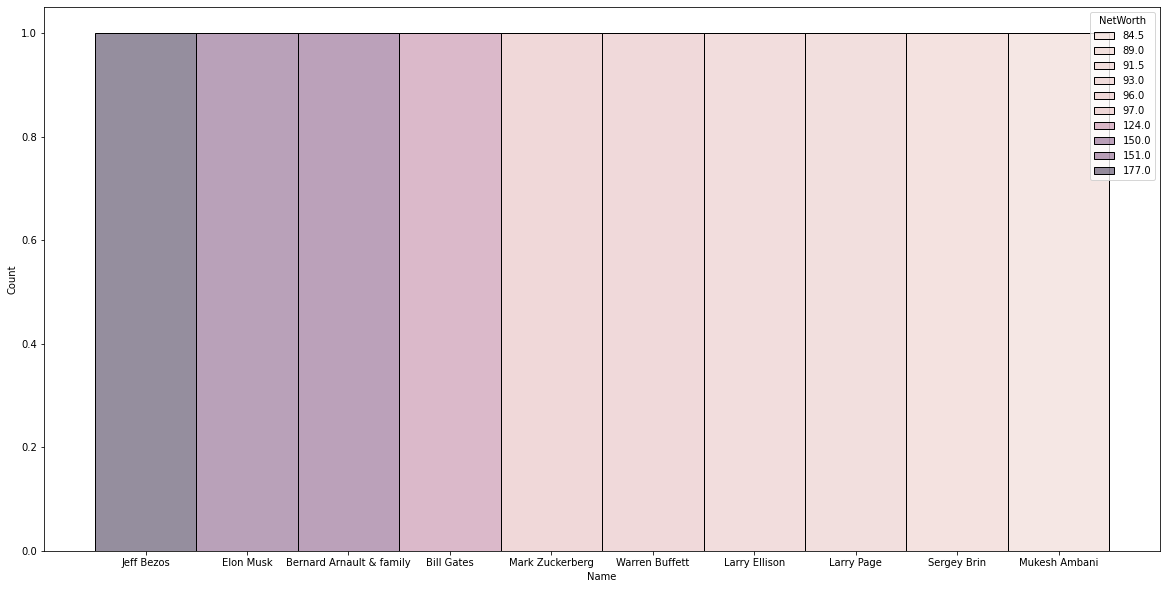

In [32]:
df = data.sort_values(by= ["NetWorth"], ascending = False).head(10)
plt.figure(figsize=(20,10))
sns.histplot(x="Name", hue="NetWorth", data=df)
plt.show()

## Now let’s have a look at the top 5 domains with the most number of billionaires

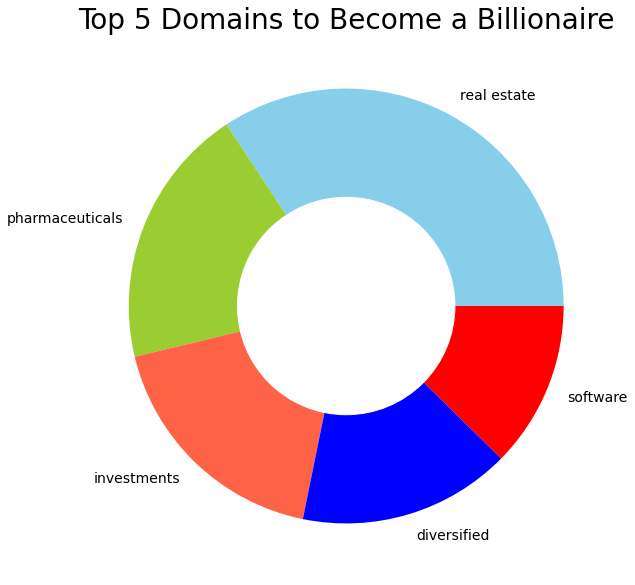

In [38]:
a = data["Source"].value_counts().head()
index = a.index
sources = a.values
custom_colors = ["skyblue", "yellowgreen", "tomato", "blue", "red"]
plt.figure(figsize=(10,10))
plt.pie(sources, labels=index, colors=custom_colors)
central_circle = plt.Circle((0,0), 0.5, color="white")
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=14)
plt.title("Top 5 Domains to Become a Billionaire", fontsize=28)
plt.show()

## Now let’s have a look at the top 5 industries with the most number of billionaires

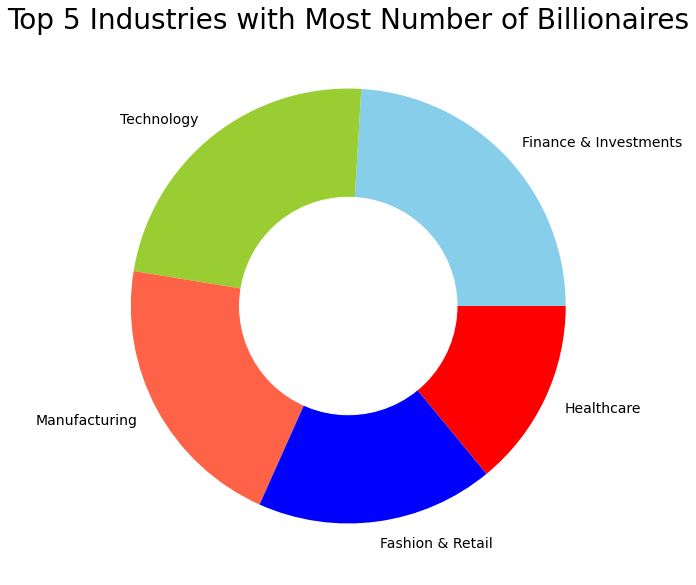

In [39]:
a = data["Industry"].value_counts().head()
index = a.index
industtries = a.values
custom_colors = ["skyblue", "yellowgreen", "tomato", "blue", "red"]
plt.figure(figsize=(10,10))
plt.pie(industtries, labels=index, colors=custom_colors)
central_circle = plt.Circle((0,0), 0.5, color="white")
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=14)
plt.title("Top 5 Industries with Most Number of Billionaires", fontsize=28)
plt.show()

## Now let’s have a look at the top 5 Name with the most number of billionaires

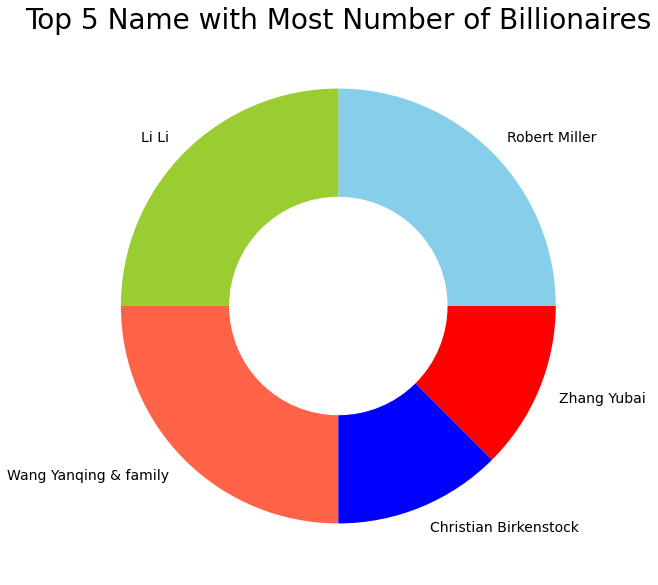

In [46]:
a = data["Name"].value_counts().head()
index = a.index
names = a.values
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(10,10))
plt.pie(names, labels=index, colors=custom_colors)
central_circle = plt.Circle((0,0), 0.5, color="white")
fig = plt.gcf()
plt.gca().add_artist(central_circle)
plt.rc("font", size=14)
plt.title("Top 5 Name with Most Number of Billionaires", fontsize=28)
plt.show()


## Now let’s have a look at the top 5 countries with the most number of billionaires

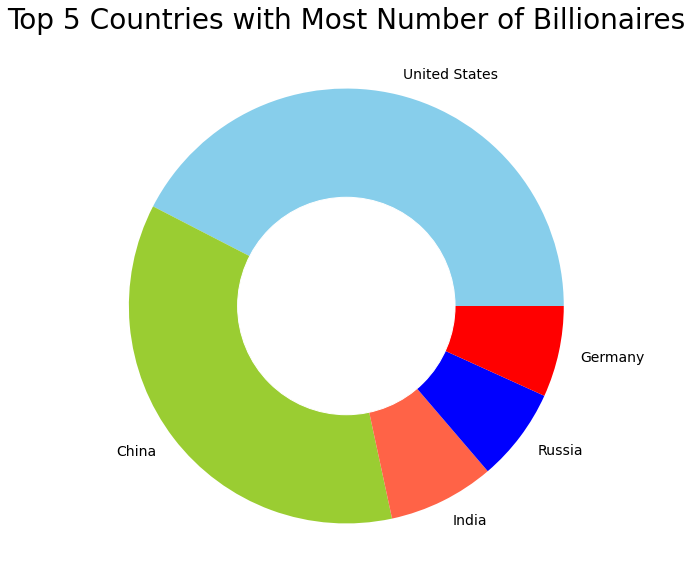

In [44]:
a = data["Country"]. value_counts().head()
index = a.index
countries = a.values
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(10,10))
plt.pie(countries, labels=index, colors=custom_colors)
central_circle = plt.Circle((0,0), 0.5, color="white")
fig = plt.gcf()
plt.gca().add_artist(central_circle)
plt.rc('font', size=14)
plt.title("Top 5 Countries with Most Number of Billionaires", fontsize=28)
plt.show()


The visualization above shows that the United States and China are the countries from which most people become billionaires. So that means the business environment and the startup success rate is really good in the US and China compared to the rest of the world.

## Summary

So this is how you can find patterns among billionaires around the world to analyze the business environment of countries. The success of a business or startup depends a lot on the business environment of a country. At the end of the analysis of global billionaires, I found that China and the United States are the countries with the most billionaires which concludes that the business environment and the success rate of a startup is much better in the US and China than in the rest of the world. Hope you liked this article on Billionaires Analysis with Python.

## Sheikh Rasel Ahmed

Data Science || Machine Learning || Deep Learning || Artificial Intelligence Enthusiast

In [ ]:
# LinkedIn - https://www.linkedin.com/in/shekhnirob1

# GitHub - https://github.com/Rasel1435

# Behance - https://www.behance.net/Shekhrasel2513